# Lab 11. Deep Neural Networks

**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*25.05.2024*

import packages

In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np


filterwarnings('ignore')

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

c:\Users\gabso\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Check mnist dataset

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


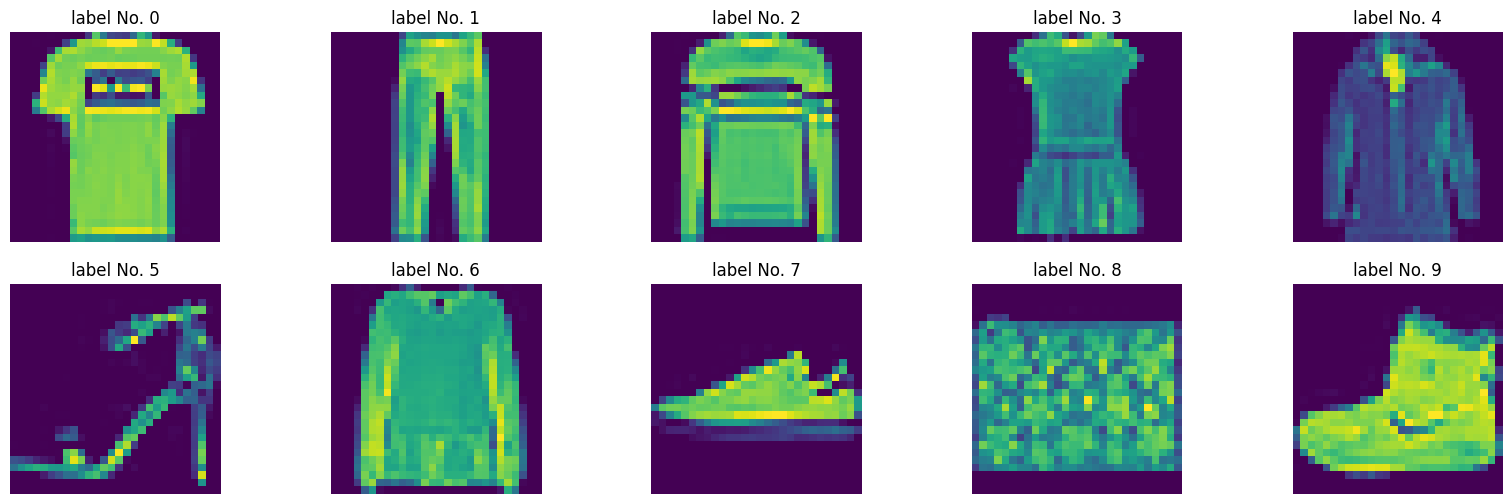

In [2]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

fig, axs = plt.subplots(2,5, figsize=(20,6))
axs = axs.flatten()

for i in range(10):
    for j, label in enumerate(train_labels):
        if i == label:
            axs[i].imshow(train_images[j])
            axs[i].axis('off')
            axs[i].set_title(f"label No. {i}")
            break

Labels from metadata:
| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

DNN Architecture 

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

DNN Compiling

In [4]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Data preparation

In [5]:
# normalize pixel values
train_images, test_images = train_images/255.0, test_images/255.0
train_images, test_images = train_images.astype(np.float32), test_images.astype(np.float32)
train_images, test_images = train_images.reshape(60000, 28*28), test_images.reshape(10000, 28*28)

Convert data format in order to use categorical_crossentropy loss function

In [6]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

DNN training

In [9]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8949 - loss: 0.2793
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9015 - loss: 0.2671
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9040 - loss: 0.2539
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9099 - loss: 0.2423
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9131 - loss: 0.2344
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9154 - loss: 0.2240
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9211 - loss: 0.2154
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9212 - loss: 0.2130
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9241 - loss: 0.2019
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9275 - loss: 0.1936


Evaluation

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8893 - loss: 0.3299
test_acc: 0.8901000022888184
